In [1]:
import pandas as pd
import numpy as np
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
data = pd.read_csv('train (Wikipedia Toxicity).csv')

In [3]:
data

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0
...,...,...,...
4995,60229df7b48ba6ff,"""\r\n\r\n Dildo, if you read my response corre...",0
4996,36a645227572ec5c,"CALM DOWN, CALM DOWN, DON'T GET A BIG DICK",1
4997,6d47fa39945ed6f5,In my opinion Dougweller is using his privileg...,0
4998,de2e4c0d38db6e30,The style section has been expanded too. I did...,0


In [4]:
data.drop(columns='id', inplace=True)

In [5]:
data.head()

,comment_text,toxic
0,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,New Categories \r\n\r\nI honestly think that w...,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  5000 non-null   object
 1   toxic         5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [7]:
#data1 = data['comment_text'].values.tolist()

In [8]:
# Pre-Processing

In [9]:

def cleaning(text):
    text = re.sub(r'\b(?:(?:https?|ftp)://)?\w[\w-]*(?:\.[\w-]+)+\S*(?<![.,])', ' ', text.lower())
    words = re.findall(r'[a-z]+', text)
    return ' '.join(words)

def tokenization(features):
    return word_tokenize(features)

def preprocesing(feature):
    words = feature.split(" ")             
    finalWords = [word for word in words if word not in stopwords.words('english')]
    return finalWords


In [10]:
features = data['comment_text'].apply(cleaning)
label = data.iloc[:,1].values
features

0       a barnstar for you the defender of the wiki ba...
1       this seems unbalanced whatever i have said abo...
2       marya dzmitruk was born in minsk belarus in ma...
3                                  talkback dear celestia
4       new categories i honestly think that we need t...
                              ...                        
4995    dildo if you read my response correctly i neve...
4996             calm down calm down don t get a big dick
4997    in my opinion dougweller is using his privileg...
4998    the style section has been expanded too i didn...
4999    any one that is not agreement with you or is a...
Name: comment_text, Length: 5000, dtype: object

In [11]:
wordVector = CountVectorizer(analyzer=preprocesing)
finalWordVocab = wordVector.fit(features)
bagOfWords = finalWordVocab.transform(features)

In [12]:
finalWordVocab.vocabulary_

{'barnstar': 1689,
 'defender': 4762,
 'wiki': 20662,
 'like': 10861,
 'edit': 5857,
 'kayastha': 10257,
 'page': 13464,
 'lets': 10779,
 'form': 7298,
 'solidarity': 17404,
 'group': 8093,
 'malign': 11284,
 'article': 1179,
 'subject': 18062,
 'matter': 11495,
 'propose': 14700,
 'folloing': 7223,
 'name': 12389,
 'united': 19673,
 'intellectuals': 9567,
 'front': 7462,
 'ethinicty': 6399,
 'racist': 15043,
 'castist': 2830,
 'abuse': 85,
 'uifkearca': 19457,
 'seems': 16674,
 'unbalanced': 19503,
 'whatever': 20573,
 'said': 16311,
 'mathsci': 11490,
 'far': 6832,
 'extreme': 6695,
 'unpleasant': 19724,
 'things': 18811,
 'mention': 11666,
 'others': 13310,
 'much': 12220,
 'greater': 8052,
 'frequency': 7429,
 'happy': 8328,
 'reign': 15492,
 'ruth': 16249,
 'told': 19003,
 'trying': 19317,
 'get': 7765,
 'pay': 13690,
 'attention': 1370,
 'stop': 17899,
 'uncivil': 19525,
 'would': 20911,
 'expect': 6592,
 'issue': 9831,
 'request': 15701,
 'intentionally': 9582,
 'reason': 15250,

In [13]:
# Removing contextual stop words

from collections import Counter
removedWords = ['wikipedia', 'page', 'edit']

In [14]:
def remove_words(df, removedWords):
    words_count = Counter()
    for sentence in df.sentences:
        words_count.update(x for x in df if x not in removedWords)

In [15]:
# df = df['comment'].apply(remove_words)

In [16]:
tfidfObject = TfidfTransformer().fit(bagOfWords)
final = tfidfObject.transform(bagOfWords)

In [80]:
# Train & Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final, label, test_size=0.3, random_state=3)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.fit(X_test,y_test)

LogisticRegression()

In [19]:
LR.score(X_train,y_train)

0.9085714285714286

In [20]:
LR.score(X_test,y_test)

0.928

In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', degree=8)
svclassifier.fit(X_train, y_train)
svclassifier.fit(X_test, y_test)

SVC(degree=8, kernel='linear')

In [22]:
y_predtrain = svclassifier.predict(X_train)
y_predtest = svclassifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predtest))
print(classification_report(y_test, y_predtest))

[[1386    2]
 [  64   48]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1388
           1       0.96      0.43      0.59       112

    accuracy                           0.96      1500
   macro avg       0.96      0.71      0.78      1500
weighted avg       0.96      0.96      0.95      1500



In [24]:
print(confusion_matrix(y_train, y_predtrain))
print(classification_report(y_train, y_predtrain))

[[3173    2]
 [  64  261]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3175
           1       0.99      0.80      0.89       325

    accuracy                           0.98      3500
   macro avg       0.99      0.90      0.94      3500
weighted avg       0.98      0.98      0.98      3500



In [25]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
grid.fit(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.907, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.907, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.907, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.907, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.907, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.907, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.907, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.907, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.907, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [27]:
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1388
           1       0.86      0.56      0.68       112

    accuracy                           0.96      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.96      0.96      0.96      1500



In [45]:
grid1 = GridSearchCV(SVC(), param_grid=param_grid, scoring='recall', cv=StratifiedKFold(n_splits=5))
grid1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='recall')

In [46]:
print(grid1.best_params_) 
print(grid1.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [48]:
grid1.fit(X_test, y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='recall')

In [47]:
grid1_predictions = grid1.predict(X_test) 
print(classification_report(y_test, grid1_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1388
           1       0.86      0.56      0.68       112

    accuracy                           0.96      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.96      0.96      0.96      1500



In [79]:
# Toxic Comments


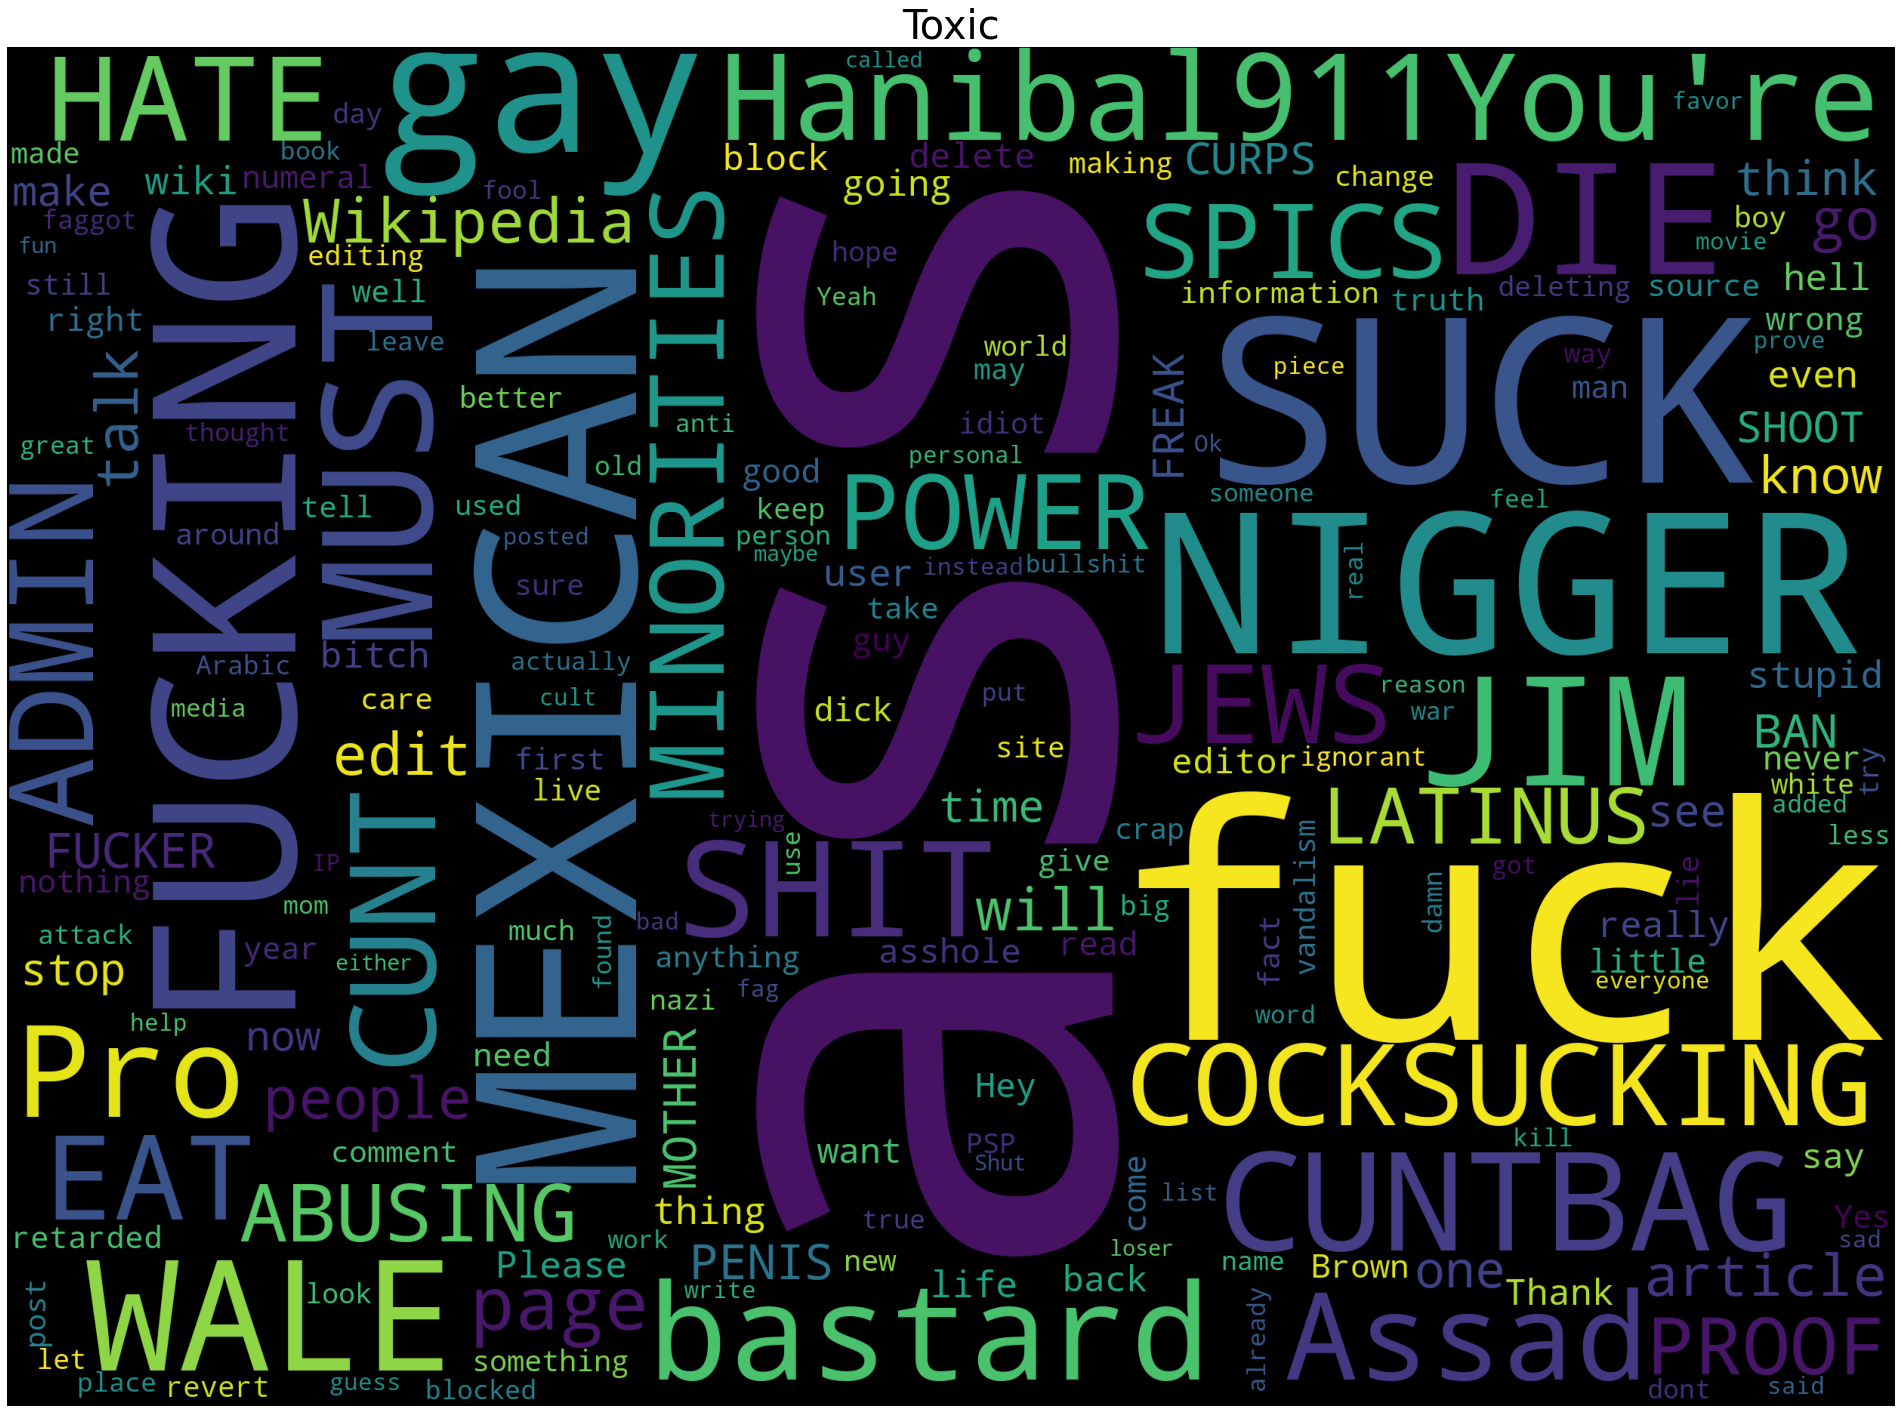

In [85]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
subset=data[data.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)